In [ ]:
# dataset kaggle link = https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats?select=test

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Input, MaxPooling2D, Flatten

In [2]:
# we can use os but it requires lot of RAM

# generators provided by keras - divide data into batches

train_ds = keras.utils.image_dataset_from_directory(
    directory = "train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)  #giving the same size to all images
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "validation_data",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)  #giving the same size to all images
)

Found 5002 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [3]:
# image is store in the form of numpy array
# normalizing the data

def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# create CNN model

model = Sequential()

model.add(Input(shape = (256, 256, 3)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.5718 - loss: 0.6948 - val_accuracy: 0.7000 - val_loss: 0.6332
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.6827 - loss: 0.5997 - val_accuracy: 0.6700 - val_loss: 0.5828
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.7459 - loss: 0.5145 - val_accuracy: 0.7400 - val_loss: 0.5074
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 395s 3s/step - accuracy: 0.8089 - loss: 0.4065 - val_accuracy: 0.7200 - val_loss: 0.6214
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 412s 3s/step - accuracy: 0.8713 - loss: 0.2895 - val_accuracy: 0.7200 - val_loss: 0.8354
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - accuracy: 0.9332 - loss: 0.1678 - val_accuracy: 0.7400 - val_loss: 1.1899
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.9640 - loss: 0.1054 - val_accuracy: 0.7700 - val_loss: 1.0562
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 482s 3s/step - accuracy: 0.9770 - loss: 0.0680 - val_accu

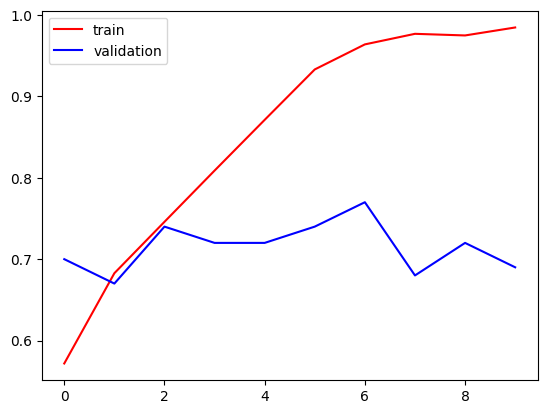

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

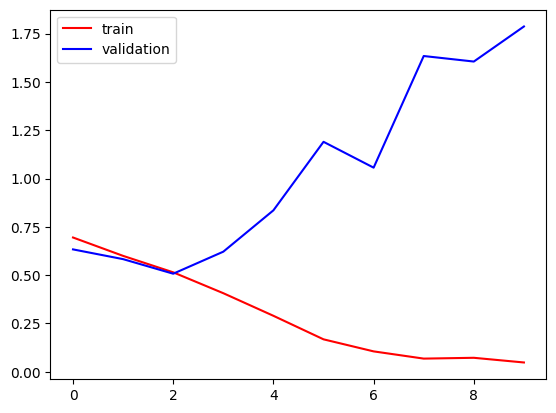

In [15]:
plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show()

In [16]:
# we can reduce overfitting by 

# using batch normalization 
# using dropout

# prediction on new single image

In [20]:
# %pip install opencv-python
import cv2

In [34]:
test_img = cv2.imread('test/2.jpg')

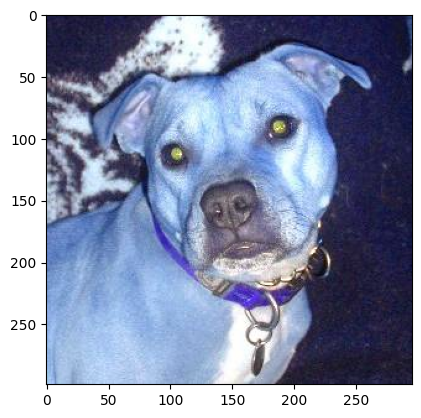

In [35]:
plt.imshow(test_img)

In [36]:
test_img.shape

(299, 296, 3)

In [37]:
# resizing the image in required format
test_input = cv2.resize(test_img, (256, 256))

In [38]:
# converting input in 4d tensor as we trained our model in batches
test_input = test_input.reshape((1, 256, 256, 3))

In [39]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[1.]], dtype=float32)

In [ ]:
# 1 means dog

In [40]:
# testing another image

In [41]:
test_img = cv2.imread('test/10.jpg')

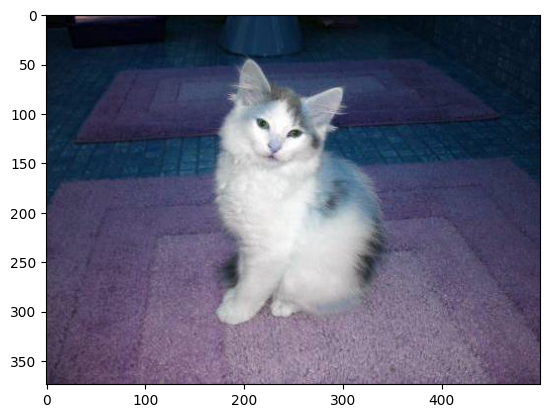

In [42]:
plt.imshow(test_img)

In [43]:
# resizing the image in required format
test_input = cv2.resize(test_img, (256, 256))

In [44]:
# converting input in 4d tensor as we trained our model in batches
test_input = test_input.reshape((1, 256, 256, 3))

In [45]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[0.]], dtype=float32)

In [ ]:
# 0 means cat